# Python K-Means Clustering

This example explains k-means clustering with Python 3, pandas and scikit-learn on Jupyter Notebook.
## Requirements
To use this example you need Python 3 and latest versions of pandas and scikit-learn. I used Anaconda distribution to install.

### Data Set:
https://catalog.data.gov/dataset/2010-census-populations-by-zip-code

### ML life-cycle:
1.	Business objective connected to it.
2.	Data set, wrangle and prepare it.
3.	What the data is saying

## Algorithm
1.	Randomly pick K cluster centers(centroids). 
2.	Assign each point to closest center. By geometry join 2 centroid and devide by perpendicular line to identify closest.
3.	Select the new centroid by taking the average of Euclidean distances of all the points assigned to that cluster.
4.	Repeat 2 and 3 until clustor assignment stop changing.

In [32]:
# K-Means Clustering

# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing the dataset
dataset = pd.read_csv('2010_Census_Populations.csv')
#Data Prepare
# Replacing 0 to NaN
dataset[['Total Population','Median Age']] = dataset[['Total Population','Median Age']].replace(0, np.NaN)
X = dataset.iloc[:, [1, 2]].values
#print(X)

# Taking care of missing data
from sklearn.preprocessing import Imputer
imputer = Imputer(missing_values = 'NaN', strategy = 'mean', axis = 0)
imputer = imputer.fit(X)
X = imputer.transform(X)

print(X)




[[1.00000000e+00 7.35000000e+01]
 [5.71100000e+04 2.66000000e+01]
 [5.12230000e+04 2.55000000e+01]
 [6.62660000e+04 2.63000000e+01]
 [6.21800000e+04 3.48000000e+01]
 [3.76810000e+04 3.39000000e+01]
 [5.91850000e+04 3.24000000e+01]
 [4.09200000e+04 2.40000000e+01]
 [3.23270000e+04 3.97000000e+01]
 [3.80000000e+03 3.78000000e+01]
 [1.03892000e+05 2.62000000e+01]
 [3.11030000e+04 3.63000000e+01]
 [1.17720000e+04 4.46000000e+01]
 [3.39646891e+04 4.48000000e+01]
 [1.89860000e+04 3.13000000e+01]
 [4.75960000e+04 3.39000000e+01]
 [2.37680000e+04 2.94000000e+01]
 [4.93100000e+04 3.32000000e+01]
 [6.44580000e+04 3.58000000e+01]
 [3.89670000e+04 3.46000000e+01]
 [3.95100000e+03 4.43000000e+01]
 [6.71790000e+04 2.98000000e+01]
 [4.59030000e+04 2.84000000e+01]
 [4.74520000e+04 2.36000000e+01]
 [4.21470000e+04 3.47000000e+01]
 [6.78690000e+04 3.40000000e+01]
 [4.51510000e+04 3.83000000e+01]
 [2.87140000e+04 3.40000000e+01]
 [3.86170000e+04 3.46000000e+01]
 [3.93160000e+04 3.35000000e+01]
 [4.578600

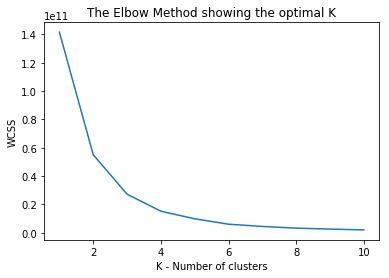

In [33]:
# Using the elbow method to get the optimal number of clusters
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method showing the optimal K')
plt.xlabel('K - Number of clusters')
plt.ylabel('WCSS')
plt.show()

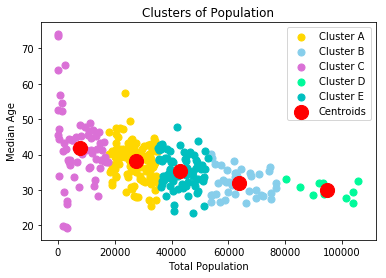

In [34]:
# Fitting K-Means to the sample dataset
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

# Scatter chart of the clusters
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 50, c = 'gold', label = 'Cluster A')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 50, c = 'skyblue', label = 'Cluster B')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 50, c = 'orchid', label = 'Cluster C')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 50, c = 'mediumspringgreen', label = 'Cluster D')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 50, c = 'c', label = 'Cluster E')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 200, c = 'red', label = 'Centroids')
plt.title('Clusters of Population')
plt.xlabel('Total Population')
plt.ylabel('Median Age')
plt.legend()
plt.show()